# **Metode A-Star Pathfinding**

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


<ipython-input-5-20e5bc920162>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


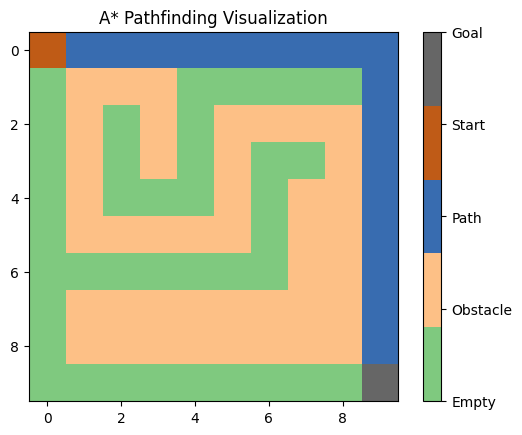

In [ ]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (9, 9)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")

## Jawaban Tugas A



1.   Kode di atas mengimplementasikan algoritma A* (A-Star) Pathfinding *yang digunakan untuk mencari jalur terpendek dari titik *start* ke *goal* dalam sebuah *grid*. Dalam terapannya dalam dunia AI, kita bisa temukan algoritma ini diterapkan secara luas oleh Google dalam layanan peta mereka, di mana user akan diberi rekomendasi jalur terpendek yang dapat ditempuh dari titik berangkat (*start*) hingga titik tujuan (*goal*) dalam peta (*grid*). Dalam game berbasis eksplorasi peta atau area yang cukup luas, algoritma ini juga banyak diterapkan sebagai panduan bagi player untuk pergi ke tempat musuh atau lawan berikutnya yang harus dikalahkan, atau mungkin misi (*quest* atau dalam bahasa AI-nya *goal*) yang harus dituntaskan.
2.   Studi kasus ini saya temukan dalam sebuah artikel di Medium yang membahas materi *A-star Pathfinding*. Dalam kasus saya ini, saya akan mencoba menerapkannya dengan algoritma yang telah diberikan Ibu Dwi, yakni algoritma *A-star Pathfinding* tanpa melibatkan gerakan diagonal. Jadi, dalam studi kasus kali ini, kita akan gunakan gerakan horizontal dan vertikal saja. Kode ada di sel berikutnya.

Sebagai catatan, gambar ini merupakan contoh yang diberikan oleh penyusun artikel Medium terkait.

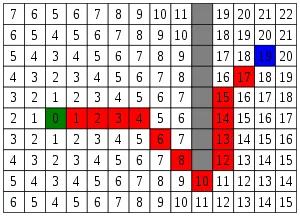



Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (7, 6)]


<ipython-input-1-95b82d404abd>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


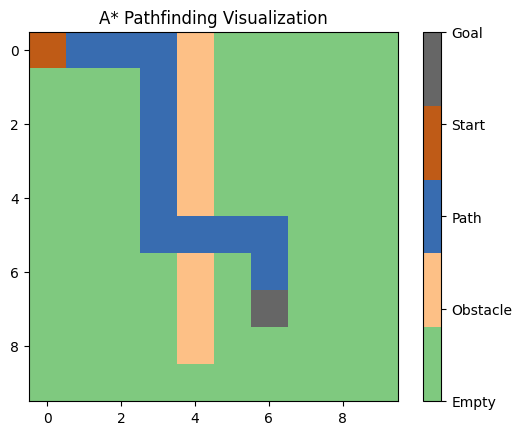

In [1]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

grid = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (7, 6)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")

Tampak berbeda dengan ilustrasi yang diberikan? Memang, karena di sini asal (*start*) sengaja diubah di titik (0,0), bukan (3,6) oleh karenanya tidak tampak sama dengan ilustrasi yang dicantumkan di atas kode. Dan jika ditambahkan gerakan diagonal, maka hasilnya akan begini:

*gerakan diagonal ditambahkan dengan menambahkan nilai
(1,1), (1,-1), (-1,1), (-1,-1)
pada `directions`

Jalur ditemukan: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]


<ipython-input-3-d0daaa6623a7>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


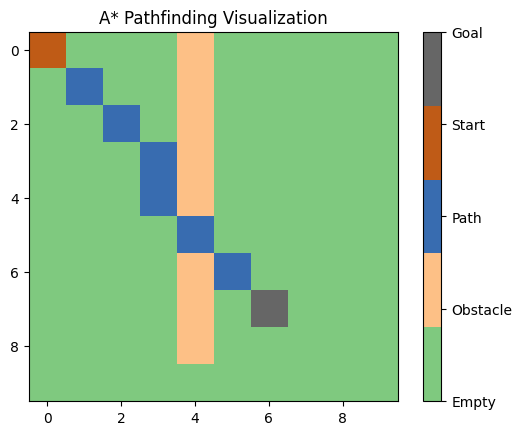

In [3]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1,1), (1,-1), (-1,1), (-1,-1)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()

grid = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (7, 6)

path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")

# **Metode Hill Climbing**

In [ ]:
import random

# Fungsi objektif yang akan dimaksimalkan
def objective_function(x):
    # Contoh fungsi objektif: f(x) = -x^2 + 4x
    return -x**2 + 4*x

# Algoritma Hill Climbing
def hill_climbing():
    # Inisialisasi solusi secara acak
    current_solution = random.uniform(-10, 10)
    current_value = objective_function(current_solution)

    step_size = 0.1
    max_iterations = 1000

    for _ in range(max_iterations):
        # Buat tetangga solusi
        neighbors = [current_solution + step_size, current_solution - step_size]

        # Evaluasi tetangga
        next_solution = max(neighbors, key=objective_function)
        next_value = objective_function(next_solution)

        # Cek apakah solusi lebih baik
        if next_value > current_value:
            current_solution = next_solution
            current_value = next_value
        else:
            # Jika tidak ada solusi lebih baik, berhenti
            break

    return current_solution, current_value

# Contoh penggunaan
best_solution, best_value = hill_climbing()
print(f"Best solution: {best_solution}")
print(f"Best value: {best_value}")

Best solution: 1.9768034384323447
Best value: 3.999461919531438


## Jawaban Tugas B



1.   Hill Climbing adalah metode heuristic search yang terinspirasi dari metode pendakian gunung atau bukit, yakni menggunakan sejumlah titik awal secara acak untuk menemukan hasil paling optimal. Metode ini efektif digunakan untuk menemukan solusi paling optimal dari sejumlah solusi yang potensial.
2.   Contoh studi kasus di bawah adalah penerapan metode hill climb pada sebuah drone yang akan memetakan puncak pegunungan. Sayang, drone hanya bisa bergerak ke kiri dan ke kanan sehingga drone hanya bisa berpindah dalam langkah kecil. Berikut contoh kode dan solusi paling optimalnya.



Drone mencapai puncak pada x = 5.03 dengan ketinggian 25.00 meter


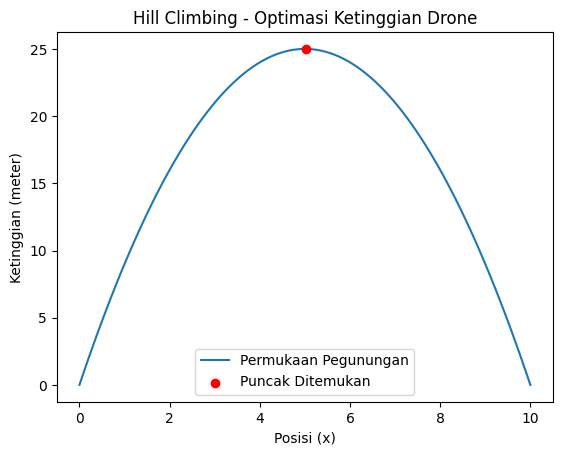

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Fungsi ketinggian pegunungan
def mountain_height(x):
    return -(x - 5) ** 2 + 25  # Puncaknya ada di x = 5, h = 25

# Hill Climbing untuk mencari puncak tertinggi
def hill_climbing():
    current_x = random.uniform(0, 10)  # Drone mulai dari posisi acak antara 0 dan 10
    current_height = mountain_height(current_x)

    step_size = 0.1  # Langkah kecil drone
    max_iterations = 100

    for _ in range(max_iterations):
        neighbors = [current_x + step_size, current_x - step_size]  # Drone bisa ke kiri atau kanan

        # Pilih tetangga dengan ketinggian tertinggi
        next_x = max(neighbors, key=mountain_height)
        next_height = mountain_height(next_x)

        if next_height > current_height:
            current_x = next_x
            current_height = next_height
        else:
            break  # Berhenti jika tidak ada tempat lebih tinggi

    return current_x, current_height

# Menjalankan algoritma
best_x, best_height = hill_climbing()
print(f"Drone mencapai puncak pada x = {best_x:.2f} dengan ketinggian {best_height:.2f} meter")

# Visualisasi permukaan gunung dan jalur drone
x_vals = np.linspace(0, 10, 100)
y_vals = mountain_height(x_vals)

plt.plot(x_vals, y_vals, label="Permukaan Pegunungan")
plt.scatter(best_x, best_height, color='red', label="Puncak Ditemukan", zorder=3)
plt.xlabel("Posisi (x)")
plt.ylabel("Ketinggian (meter)")
plt.legend()
plt.title("Hill Climbing - Optimasi Ketinggian Drone")
plt.show()


# **Pencarian Greedy Best-First untuk Routing Hirarkis**

Path from A to M: ['A', 'C', 'G', 'M']


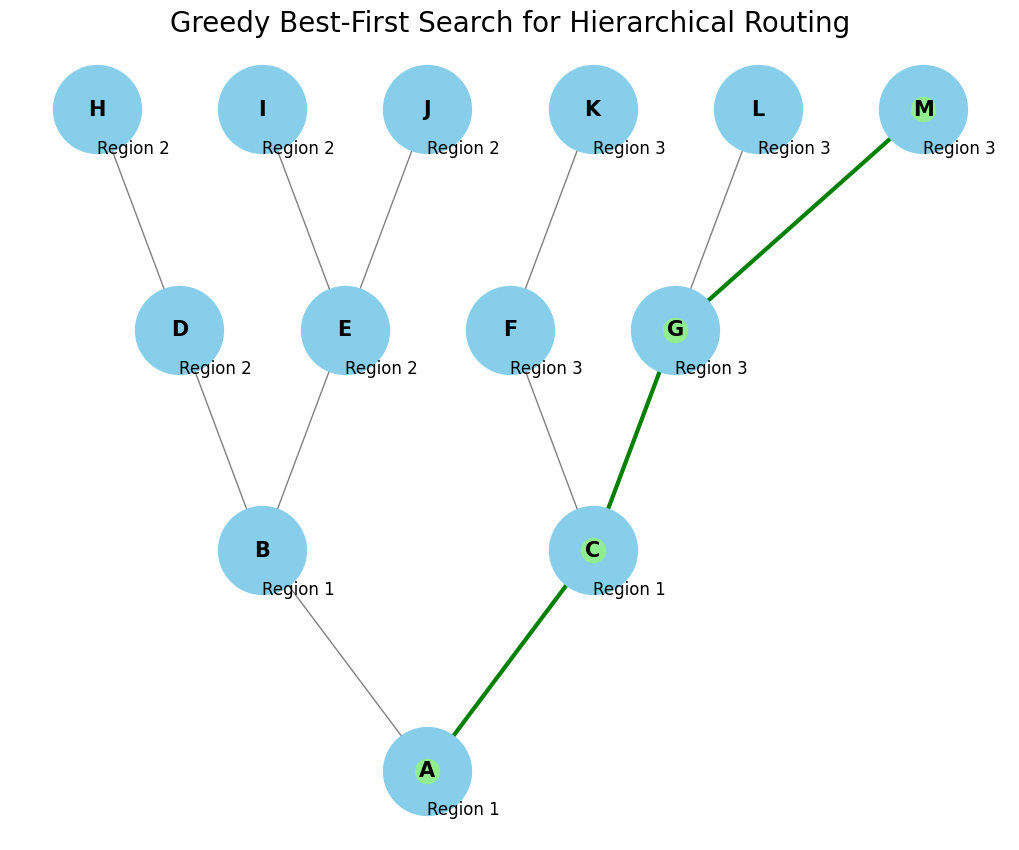

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic


def greedy_best_first_search_hierarchical(graph, start, goal, heuristic, region_map):
    priority_queue = []  # Antrian prioritas berdasarkan nilai heuristik
    heapq.heappush(priority_queue, Node(start, heuristic[start]))  # Masukkan node awal

    visited = set()  # Menyimpan node yang sudah dikunjungi
    path = {start: None}  # Menyimpan jalur dari node yang dieksplorasi

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name  # Ambil node dengan heuristik terkecil

        if current_node == goal:  # Jika goal ditemukan, rekonstruksi jalur
            return reconstruct_path(path, start, goal)

        visited.add(current_node)  # Tandai node sebagai sudah dikunjungi

        # Eksplorasi tetangga dalam region yang sama
        current_region = region_map[current_node]
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] == current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        # Eksplorasi tetangga di region lain
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] != current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None  # Jika tidak ditemukan jalur


def reconstruct_path(path, start, goal):
    current = goal
    result_path = []

    while current is not None:
        result_path.append(current)  # Tambahkan node ke jalur
        current = path[current]  # Pindah ke node induk

    result_path.reverse()  # Urutkan jalur agar dari start ke goal
    return result_path


def visualize_graph(graph, path, pos, region_map):
    G = nx.Graph()

    # Tambahkan edge ke graf
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(10, 8))  # Atur ukuran gambar

    # Gambar node dan edge
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue',
            font_size=15, font_weight='bold', edge_color='gray')

    # Sorot jalur hasil pencarian
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen')

    # Tambahkan informasi region pada graf
    for node, region in region_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Region {region}", fontsize=12, color='black')

    plt.title("Greedy Best-First Search for Hierarchical Routing", size=20)
    plt.show()


# Complex graph with hierarchical regions
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I', 'J'],
    'F': ['K'],
    'G': ['L', 'M'],
    'H': [],
    'I': [], 'J': [], 'K': [], 'L': [], 'M': []
}

# Heuristic values (assumed for this example)
heuristic = {
    'A': 8, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'F': 5, 'G': 4,
    'H': 3, 'I': 2, 'J': 2, 'K': 3, 'L': 2, 'M': 1
}

# Define regions for the hierarchical routing (nodes belonging to different regions)
region_map = {
    'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 3,
    'H': 2, 'I': 2, 'J': 2, 'K': 3, 'L': 3, 'M': 3
}


# Define positions for better visualization layout (can be modified)
pos = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2),
    'E': (-0.5, 2), 'F': (0.5, 2), 'G': (1.5, 2), 'H': (-2, 3),
    'I': (-1, 3), 'J': (0, 3), 'K': (1, 3), 'L': (2, 3), 'M': (3, 3)
}

# Perform Greedy Best-First Search for hierarchical routing
start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_hierarchical(graph, start_node, goal_node, heuristic, region_map)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualize the graph and the found path
visualize_graph(graph, result_path, pos, region_map)

# Jawaban Tugas C



1.   Greedy Best First Search (GBFS) merupakan metode heuristic search yang mengupayakan pencarian secara cepat untuk metode yang paling cepat "secara heuristik" untuk mencapai tujuan (*goal*). Perbedaan utamanya dengan A-star Pathfinding adalah titik fokus mereka. Jika GBFS berfokus pada perkiraan rute tercepat tanpa memperhitungkan biaya, maka A-star akan memperhitungkan juga biaya rute agar dicapailah biaya rute paling optimal. Jadi, GBFS bisa digunakan jika menginginkan hasil yang lebih cepat dan A-star akan lebih baik digunakan jika menginginkan solusi yang lebih optimal.
2.   Contohnya di bawah ini. Sebuah AI navigasi pemula ingin
 dilatih untuk menemukan jalan dari kota A ke kota K.


Path from A to K: ['A', 'C', 'G', 'K']


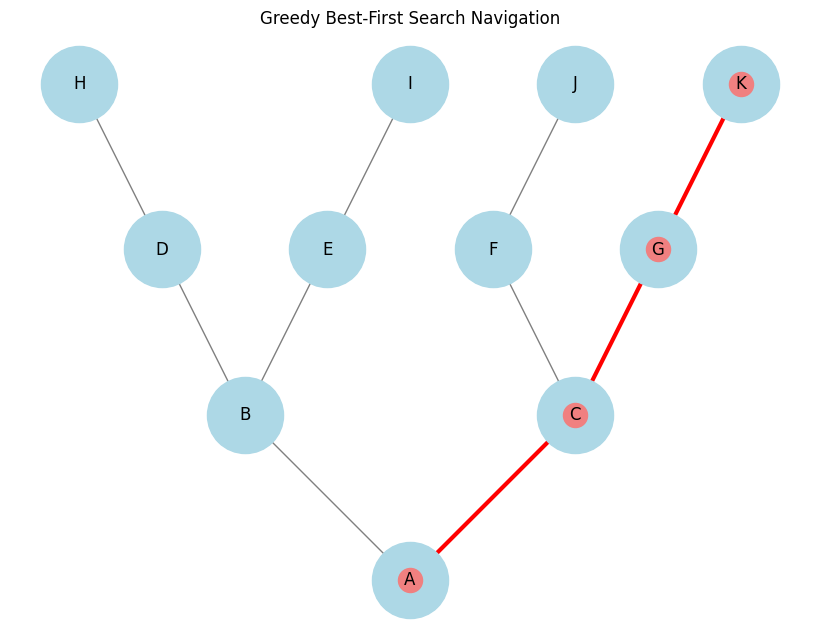

In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic

# Implementasi Greedy Best-First Search
def greedy_best_first_search(graph, start, goal, heuristic):
    priority_queue = []
    heapq.heappush(priority_queue, Node(start, heuristic[start]))

    visited = set()
    path = {start: None}

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name

        if current_node == goal:
            return reconstruct_path(path, start, goal)

        visited.add(current_node)

        for neighbor in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None

# Fungsi rekonstruksi jalur setelah menemukan tujuan
def reconstruct_path(path, start, goal):
    current = goal
    result_path = []

    while current is not None:
        result_path.append(current)
        current = path[current]

    result_path.reverse()
    return result_path

# Visualisasi graf dan jalur hasil pencarian
def visualize_graph(graph, path, pos):
    G = nx.Graph()

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, edge_color='gray')

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightcoral')

    plt.title("Greedy Best-First Search Navigation")
    plt.show()

# Definisi graf dengan node sebagai kota-kota kecil
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I'],
    'F': ['J'],
    'G': ['K'],
    'H': [], 'I': [], 'J': [], 'K': []
}

# Heuristik (jarak estimasi ke tujuan 'K')
heuristic = {
    'A': 6, 'B': 5, 'C': 4, 'D': 4, 'E': 3, 'F': 3, 'G': 2,
    'H': 3, 'I': 2, 'J': 2, 'K': 0  # K adalah tujuan
}

# Posisi untuk visualisasi
pos = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2), 'E': (-0.5, 2),
    'F': (0.5, 2), 'G': (1.5, 2), 'H': (-2, 3), 'I': (0, 3),
    'J': (1, 3), 'K': (2, 3)
}

# Jalankan algoritma
start_node = 'A'
goal_node = 'K'
result_path = greedy_best_first_search(graph, start_node, goal_node, heuristic)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualisasi hasil pencarian
visualize_graph(graph, result_path, pos)

Sebuah AI navigasi pemula ingin dilatih untuk menemukan jalan dari kota A ke kota K. Namun, karena AI masih belum mempelajari biaya perjalanan, jadi ia menggunakan perkiraan (*heuristic*) untuk memperkirakan jalur tercepat, yakni jalur yang tampak lurus-lurus saja, yakni A-C-G-K. Ini serupa dengan gaya berpikir manusia yang baru saja datang ke sebuah tempat baru dan mengira kalau jalan lurus adalah jalan tercepat mencapai tujuan.

Untuk nomer 3, **apa beda cara kerja dari BFS dan GBFS?**

perbedaan utamanya adalah pada cara kerjanya di mana BFS akan mengeksplorasi ke seluruh jalur dan node untuk menemukan jalur teringkas dan terpendek. Adapun GBFS, ia berangkat dari asumsi (heuristik) tanpa memperhitungkan apakah biaya yang dibutuhkan akan lebih mahal atau bisa jadi rupanya lebih jauh dibanding dengan jalur lain.